In [ ]:
# types of bagging


# bootstraping + aggregation = bagging

In [ ]:
#bootstraping into n number of datapackets and give them to the same algorithms and Aggregate the result (generally without repetablity)

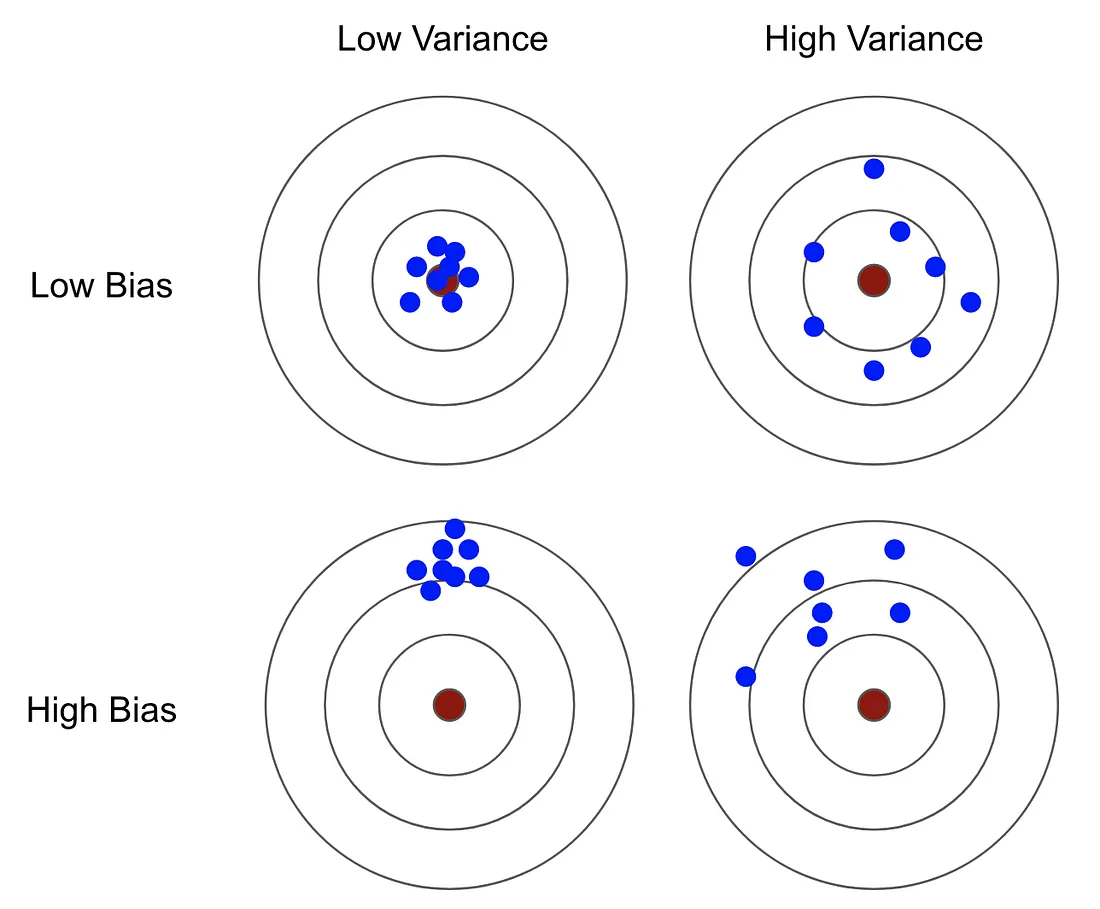

In [ ]:
## the problem we solve is LOW BIAS AND HIGH VARIANCE (WHERE THERE IS OVER FITTING)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load directly as a DataFrame
df = sns.load_dataset('iris')

In [ ]:
df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
31,5.4,3.4,1.5,0.4,setosa
25,5.0,3.0,1.6,0.2,setosa
141,6.9,3.1,5.1,2.3,virginica
97,6.2,2.9,4.3,1.3,versicolor


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [ ]:
df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,2
93,5.0,2.3,3.3,1.0,1
100,6.3,3.3,6.0,2.5,2
69,5.6,2.5,3.9,1.1,1
134,6.1,2.6,5.6,1.4,2
143,6.8,3.2,5.9,2.3,2


In [ ]:
df =df[df['species']!=0][['sepal_width','petal_length','species']]

In [ ]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,sepal_width,petal_length,species
115,3.2,5.3,2
109,3.6,6.1,2
105,3.0,6.6,2
87,2.3,4.4,1
96,2.9,4.2,1
114,2.8,5.1,2
92,2.6,4.0,1
147,3.0,5.2,2
63,2.9,4.7,1
132,2.8,5.6,2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

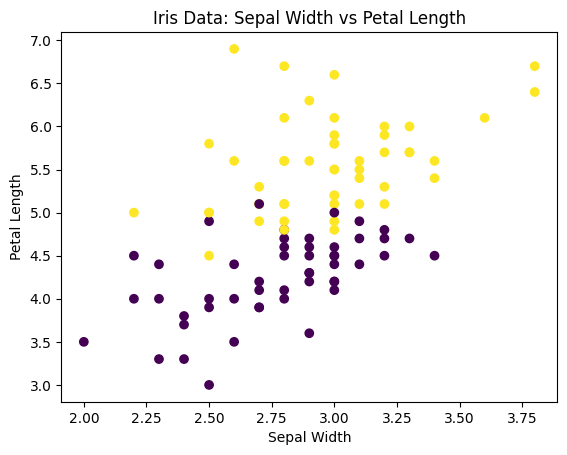

In [ ]:
plt.scatter(x=df['sepal_width'], y=df['petal_length'], c=df['species'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Iris Data: Sepal Width vs Petal Length')
plt.show()

In [ ]:
X_test = df_test.iloc[:,0:2].values
y_test = df_test.iloc[:,-1].values

# **BAGGING**

# *Boot-straping*

In [ ]:
df_bag = df_train.sample(8, replace=True)

X= df_bag.iloc[:,0:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
147,3.0,5.2,2
114,2.8,5.1,2
105,3.0,6.6,2
132,2.8,5.6,2
132,2.8,5.6,2
114,2.8,5.1,2
105,3.0,6.6,2
87,2.3,4.4,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()  #low bias high variance with unlimited depth bnega

In [ ]:
def evaluate(clf, X, y):
  clf.fit(X,y)
  plot_tree(clf, filled=True)
  plt.show()
  plot_decision_regions(X, y, clf=clf, legend=2)
  plt.show()
  y_pred = clf.predict(X_test)
  print(y_pred)
  print(accuracy_score(y_test, y_pred))


In [ ]:
# getting a decision tree , training on input and output, plot the tree, plot decision region , print accuracy score

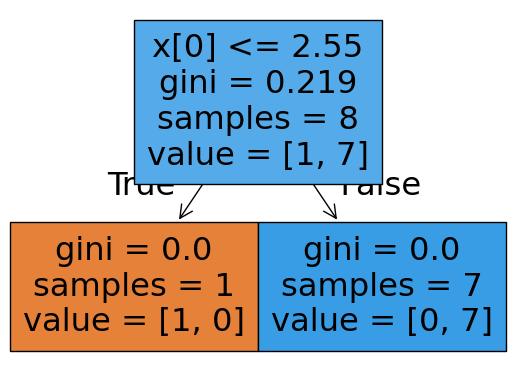

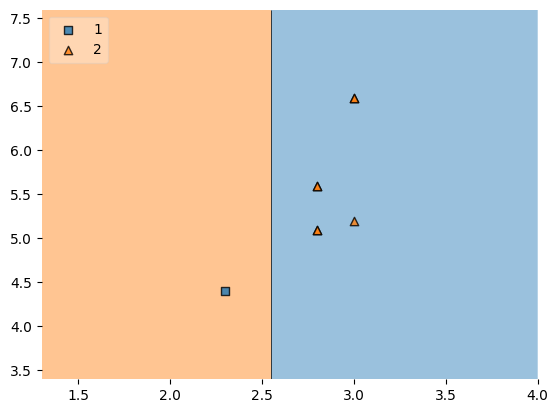

[2 2 2 2 2]
0.4


In [ ]:
evaluate(dt_bag1,X,y)

In [ ]:
df_bag = df_train.sample(8, replace=True)

X= df_bag.iloc[:,0:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
147,3.0,5.2,2
109,3.6,6.1,2
147,3.0,5.2,2
132,2.8,5.6,2
109,3.6,6.1,2
114,2.8,5.1,2
63,2.9,4.7,1
114,2.8,5.1,2


In [ ]:
dt_bag2 = DecisionTreeClassifier()

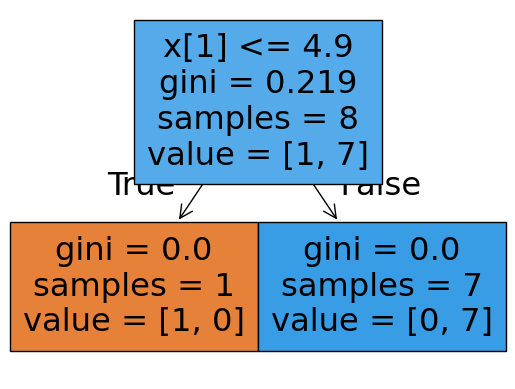

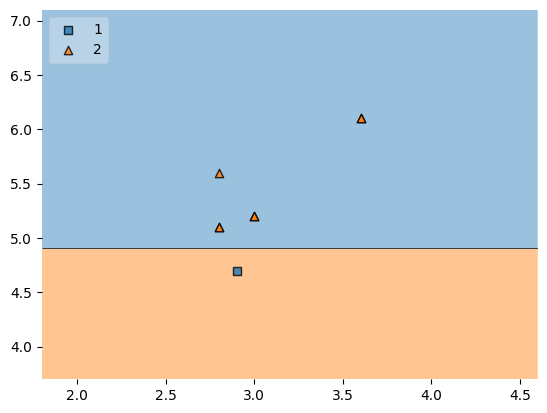

[1 2 2 1 1]
1.0


In [ ]:
evaluate(dt_bag2,X,y)

In [ ]:
df_bag = df_train.sample(8, replace=True)

X= df_bag.iloc[:,0:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
132,2.8,5.6,2
114,2.8,5.1,2
105,3.0,6.6,2
105,3.0,6.6,2
132,2.8,5.6,2
132,2.8,5.6,2
96,2.9,4.2,1
132,2.8,5.6,2


In [ ]:
dt_bag3 = DecisionTreeClassifier()

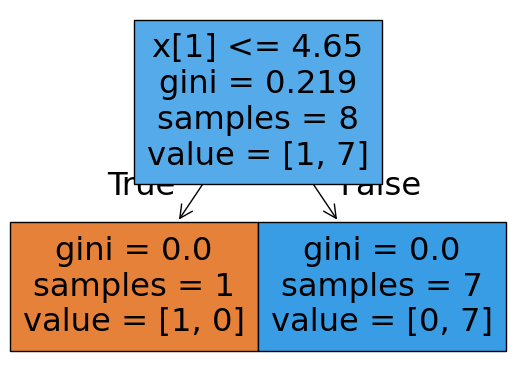

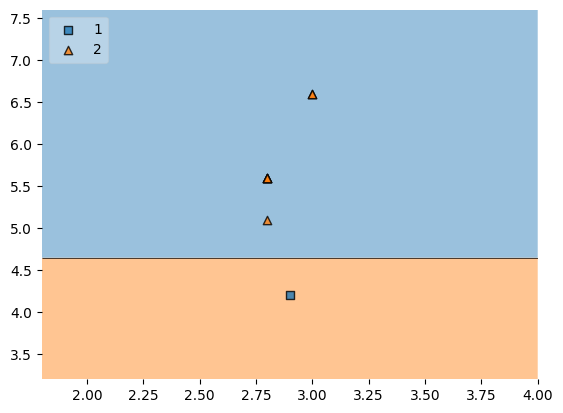

[1 2 2 1 1]
1.0


In [ ]:
evaluate(dt_bag3,X,y)

# *Aggregation*

In [ ]:
df_test

,sepal_width,petal_length,species
61,3.0,4.2,1
145,3.0,5.2,2
102,3.0,5.9,2
66,3.0,4.5,1
99,2.8,4.1,1


In [ ]:
print("answer1",dt_bag1.predict(np.array([3.0,4.2]).reshape(1,2)))
print("answer2",dt_bag2.predict(np.array([3.0,4.2]).reshape(1,2)))
print("answer3",dt_bag3.predict(np.array([3.0,4.2]).reshape(1,2)))

answer1 [2]
answer2 [1]
answer3 [1]


In [ ]:
##1.pasting: row sampling but without replacement
##2.random subspace: with or without replacement
##3. random patches :

In [ ]:
df.sample(2,replace=True,axis=1) #asix 1 krte hi column hogya

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [ ]:
df.sample(8,replace=True,axis=0).sample(2,replace=True,axis=1)

,sepal_width,sepal_width
99,2.8,2.8
147,3.0,3.0
35,3.2,3.2
29,3.2,3.2
108,2.5,2.5
88,3.0,3.0
10,3.7,3.7
84,3.0,3.0
